In [3]:
# EXOZIPPy Test Notebook
# 
# This notebook contains comprehensive tests for the EXOZIPPy package,
# including validation of key functions and performance benchmarks.

import sys, os

In [4]:
# Import required packages
import numpy as np
import exozippy
from exozippy.exozippy_rv import exozippy_rv

## 1. Radial Velocity Function Tests

This section validates the `exozippy_rv` function against known expected values.

In [5]:
# Test parameters
tp = 2450000.0       # Time of periastron
period = 10.123456   # Orbital period in days  
bjd = np.linspace(tp, tp + period, 10)  # Time array
gamma = 20.0         # Systemic velocity (km/s)
K = 5.0             # RV semi-amplitude (km/s)

# Calculate RV using exozippy function
result = exozippy_rv(bjd, tp, period, gamma, K)

# Expected results from reference implementation
expected_result = np.array([
    20.0000000000, 16.7860619518, 15.0759612351, 15.6698729813, 
    18.2898992834, 21.7101007163, 24.3301270186, 24.9240387650, 
    23.2139380484, 20.0000000004
])

# Validation
abs_diff = np.abs(result - expected_result)
if np.all(abs_diff < 1e-6):
    print("✓ RV function test PASSED - All values match within tolerance")
    print(f"  Maximum absolute difference: {np.max(abs_diff):.2e}")
else:
    print("✗ RV function test FAILED")
    print(f"  Maximum absolute difference: {np.max(abs_diff):.2e}")
    print(f"  Computed: {result}")
    print(f"  Expected: {expected_result}")

✓ RV function test PASSED - All values match within tolerance
  Maximum absolute difference: 4.37e-11


## 2. Transit Function Tests

This section tests the transit light curve modeling functions.

### Reference IDL Code for Transit Light Curve Generation

The following IDL code was used to generate the reference transit light curve:

```idl
; print_transit.pro
time = FINDGEN(50) * (0.05 - (-0.05)) / (50 - 1) + (-0.05)    
inc = 1.5707963267948966                                        
ar = 15
tp = 0
period = 3
e = 0 
omega = 1.5707963267948966 
p = 0.1
u1 = 0.3
u2 = 0.2
f0 = 1
lc = EXOFAST_TRAN(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)
print, lc
exit
```

In [6]:
## 3. Transit Performance Tests

### Setup transit model parameters

In [7]:
# ### EXOFASTv2 transit
# exofastv2_transit = np.array([1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,\
#                                  1.0000000,0.99892081,0.99583177,0.99241022,0.99085690,0.99027731,0.98986287,\
#                                  0.98954655,0.98929758,0.98909840,0.98893790,0.98880854,0.98870500,0.98862345,\
#                                  0.98856108,0.98851590,0.98848651,0.98847203,0.98847203,0.98848651,0.98851590,\
#                                  0.98856109,0.98862345,0.98870500,0.98880854,0.98893790,0.98909840,0.98929758,\
#                                  0.98954656,0.98986287,0.99027732,0.99085691,0.99241028,0.99583183,0.99892086,\
#                                  1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000])

# import numpy as np
# import matplotlib.pyplot as plt
from exozippy.exozippy_tran import exozippy_tran  # adjust import path accordingly
# %matplotlib widget
# def test_exozippy_tran_sample():
#     # Time array (days) centered on mid-transit
#     time = np.linspace(-0.05, 0.05, 50)  # some arbitrary BJD

#     # Planet & star system parameters
#     inc = np.radians(90.0)        # nearly edge-on
#     ar = 15.0                     # a/R*
#     tp = 0         # time of periastron
#     period = 3.0                  # days
#     e = 0.0                       # circular orbit
#     omega = np.radians(90.0)                   # periastron argument
#     p = 0.1                       # Rp/R*
#     u1 = 0.3                      # LD coefficients
#     u2 = 0.2
#     f0 = 1.0                      # baseline flux

#     # Call model
#     model_flux = exozippy_tran(
#         time, inc, ar, tp, period, e, omega, p, u1, u2, f0
#     )

#     # Check output shape
#     assert model_flux.shape == time.shape, "Model output shape mismatch"

#     # # Check that there is some dimming (i.e., transit exists)
#     assert np.min(model_flux) < f0 - 1e-4, "No transit dip found in flux"

#     import matplotlib.gridspec as gridspec
#     plt.figure(figsize=(12, 5))
#     nrow = 2
#     ncol = 1
#     gs = gridspec.GridSpec(nrow, ncol, width_ratios=None, height_ratios=(2,1))
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None)
#     ax = plt.subplot(gs[0])
#     min_x = np.min(time*24)
#     max_x = np.max(time*24)
#     ax.set_xlim(min_x, max_x)
#     ax.plot(time*24, model_flux, label="Exozippy", alpha=0.5)
#     ax.plot(
#         time*24, exofastv2_transit, label="EXOFASTv2", alpha=0.5
#     )
    
#     ax.legend()
    
#     ax = plt.subplot(gs[1], sharex=ax)
#     diff = model_flux - exofastv2_transit
#     plt.plot(time*24, diff, label="exozippy - EXOFASTv2", alpha=0.5, color='k')
#     plt.xlabel("Time [hrs from mid-transit]")
#     plt.ylabel("Normalized Flux")
#     plt.legend()
#     plt.show()

# if __name__ == "__main__":
#     test_exozippy_tran_sample()

Generated transit light curve with 10000 data points
Transit depth: 0.0115
Flux range: [0.988470, 1.000000]


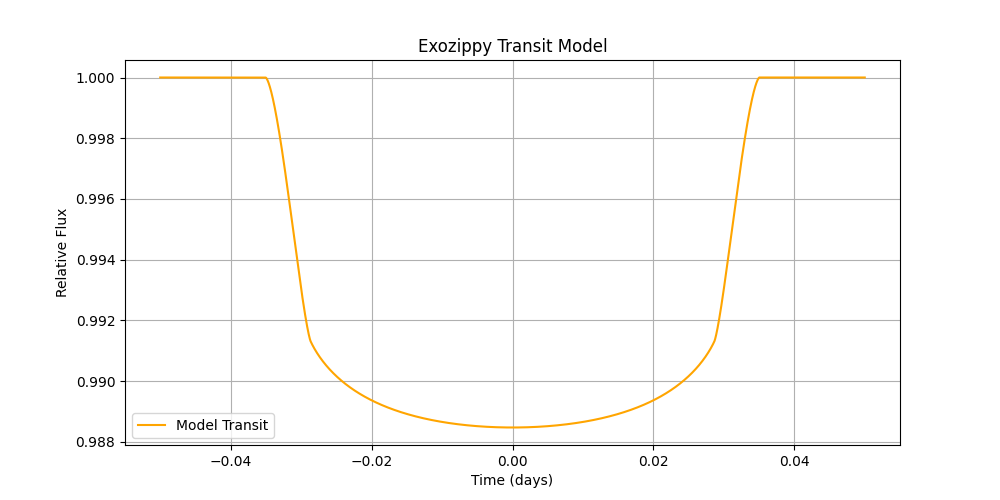

In [8]:
# Import transit function
from exozippy.exozippy_tran import exozippy_tran

# High-resolution time array for performance testing
time = np.linspace(-0.05, 0.05, 10000)  # 10k data points

# Transit system parameters
inc = np.radians(90.0)    # Orbital inclination (edge-on)
ar = 15.0                 # Semi-major axis in stellar radii (a/R*)
tp = 0                    # Time of periastron passage
period = 3.0              # Orbital period (days)
e = 0.0                   # Eccentricity (circular orbit)
omega = np.radians(90.0)  # Argument of periastron
p = 0.1                   # Planet-to-star radius ratio (Rp/R*)
u1 = 0.3                  # Linear limb darkening coefficient
u2 = 0.2                  # Quadratic limb darkening coefficient
f0 = 1.0                  # Baseline flux

# Generate transit light curve
model_flux = exozippy_tran(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)

print(f"Generated transit light curve with {len(time)} data points")
print(f"Transit depth: {(1.0 - np.min(model_flux)):.4f}")
print(f"Flux range: [{np.min(model_flux):.6f}, {np.max(model_flux):.6f}]")
plt.figure(figsize=(10, 5))
plt.plot(time, model_flux, label='Model Transit', color='orange')
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Exozippy Transit Model')
plt.legend()
plt.grid()
plt.show()

In [9]:
# def test_exozippy_tran_repeated(n=10):
#     for _ in range(n):
#         exozippy_tran(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)

# %prun -l 20 -s tottime test_exozippy_tran_repeated(5000)


In [10]:
### Line-by-line performance profiling

# Load line profiler extension
%load_ext line_profiler

def transit_wrapper():
    """Wrapper function for profiling the transit calculation."""
    return exozippy_tran(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)

# Run line-by-line profiler
%lprun -f exozippy_tran transit_wrapper()

Timer unit: 1e-09 s

Total time: 0.001437 s
File: /Users/wangxianyu/Program/Github/EXOZIPPy/exozippy/exozippy_tran.py
Function: exozippy_tran at line 52

Line #      Hits         Time  Per Hit   % Time  Line Contents
    52                                           def exozippy_tran(
    53                                               time, inc, ar, tp, period, e, omega, p, u1, u2, f0,
    54                                               rstar=None, thermal=0.0, reflect=0.0, beam=0.0, ellipsoidal=0.0,
    55                                               phaseshift=0.0, dilute=0.0, tc=None, q=None, x1=None, y1=None, z1=None,
    56                                               au=215.094177, c=None
    57                                           ):
    58                                               # If we have stellar radius, convert time to target's barycentric frame
    59         1       1000.0   1000.0      0.1      if rstar is not None:
    60                                  

### EXOZIPPy Transit Timing Benchmark

In [11]:
%%timeit
model_flux = exozippy_tran(
    time, inc, ar, tp, period, e, omega, p, u1, u2, f0
)

999 μs ± 15.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 4. Performance Comparison with Batman

For comparison, we benchmark against the widely-used Batman transit package.

In [12]:
# Import Batman for comparison
import batman

In [13]:
%%timeit
### Batman Transit Timing Benchmark
# Set up Batman parameters (similar to EXOZIPPy parameters)
params = batman.TransitParams()
params.t0 = 0.                       # Time of inferior conjunction
params.per = 1.                      # Orbital period
params.rp = 0.1                      # Planet radius (in units of stellar radii)
params.a = 15.                       # Semi-major axis (in units of stellar radii)
params.inc = 87.                     # Orbital inclination (in degrees)
params.ecc = 0.                      # Eccentricity
params.w = 90.                       # Longitude of periastron (in degrees)
params.u = [0.1, 0.3]                # Limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       # Limb darkening model

t = np.linspace(-0.05, 0.05, 10000)  # Same time array as EXOZIPPy
m = batman.TransitModel(params, t)    # Initialize model
flux = m.light_curve(params)          # Calculate light curve

151 μs ± 1.59 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 5. Utility Function Tests

Testing various utility functions and file I/O operations.

In [14]:
# Import utility functions and external packages
from exozippy.utils import *
from scipy.io import readsav

In [15]:
# Test Kepler equation solver
kepler_result = np.float64(exozippy_keplereq(np.atleast_1d(0.1), np.atleast_1d(0.2)))
print(f"Kepler equation solution: {kepler_result}")
print(f"Input mean anomaly: 0.1, eccentricity: 0.2")

Kepler equation solution: 0.12491884154998828
Input mean anomaly: 0.1, eccentricity: 0.2


/var/folders/7m/0jn2hzh91_z_7m1539kskzx00000gn/T/ipykernel_68667/472855059.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kepler_result = np.float64(exozippy_keplereq(np.atleast_1d(0.1), np.atleast_1d(0.2)))


In [16]:
# Test data file reading capabilities
import glob

# Read transit data files
tran_files = glob.glob('../data/exofastv2/examples/hat3/*.dat')
print(f"Found {len(tran_files)} transit data files:")
for file in tran_files:
    print(f"  {file}")

# Test transit file reader
from exozippy.readtran import readtran
for file in tran_files:
    transit_data = readtran(file)
    print(f"\nTransit file: {file.split('/')[-1]}")
    print(f"  Data points: {len(transit_data['time'])}")
    print(f"  Time range: [{transit_data['time'][0]:.6f}, {transit_data['time'][-1]:.6f}]")

# Read radial velocity data files  
rv_files = glob.glob('../data/exofastv2/examples/hat3/*.rv')
print(f"\nFound {len(rv_files)} RV data files:")

from exozippy.readrv import readrv
for file in rv_files:
    rv_data = readrv(file)
    print(f"\nRV file: {file.split('/')[-1]}")
    print(f"  Data points: {len(rv_data['time'])}")
    print(f"  RV range: [{np.min(rv_data['rv']):.3f}, {np.max(rv_data['rv']):.3f}] km/s")

Found 1 transit data files:
  ../data/exofastv2/examples/hat3/n20070428.Sloani.KepCam.dat


ModuleNotFoundError: No module named 'exozippy.readtran'

In [ ]:
# Test SED and prior utilities (commented out for now)
# from exozippy.utils import get_av_prior
# from exozippy.sed.mkticsed import mkticsed

# Example usage:
# get_av_prior(object_name='HAT-P-3')
# mkticsed(ticid=307210830)

print("SED utilities are available but not tested in this run")

In [ ]:
# import re
# import json

# def parse_param_file(filepath):
#     text = open(filepath, 'r').read()
#     params = {}
#     lines = text.strip().split("\n")
    
#     for line in lines:
#         line = line.strip()
#         if not line or line.startswith("#"):
#             continue  # skip comments and blank lines

#         parts = re.split(r'\s+', line.split("#")[0].strip())
#         label = parts[0]
#         values = list(map(float, parts[1:]))

#         # Assign values based on number of columns
#         mu = values[0] if len(values) > 0 else None
#         sigma = values[1] if len(values) > 1 else None
#         lower = values[2] if len(values) > 2 else None
#         upper = values[3] if len(values) > 3 else None
#         initval = values[4] if len(values) > 4 else None

#         params[label] = {
#             "mu": mu,
#             "sigma": sigma,
#             "lower": lower,
#             "upper": upper,
#             "initval": initval
#         }

#     return params



# parsed = parse_param_file('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.priors')
# print(json.dumps(parsed, indent=2))
# # save to json file
# with open('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3.json', 'w') as json_file:
#     json.dump(parsed, json_file, indent=2)


In [ ]:
# from exozippy import exozippy

# ss = exozippy.exozippy(parfile="/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3.json",tranpath="/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/*.dat")



In [ ]:
# print(ss['star'][0]['radius'].value)

In [ ]:
# from exozippy.sed import read_sed_file
from exozippy.sed.utils import read_sed_file

sed_data = read_sed_file('/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.sed',1)

sedbands = sed_data['sedbands']
mags = sed_data['mag']
errs = sed_data['errmag']
blend = sed_data['blend']
print(sedbands,mags,errs,blend)

In [ ]:
## 6. SED Model Validation
# Import SED utilities
from exozippy.sed.utils import read_sed_file, mistmultised    
import pathlib

# Test MIST multi-SED with reference stellar parameters
print("Testing MIST SED model...")
print("Input parameters:")
print("  Teff = 5777 K")
print("  log g = 4.4")  
print("  [Fe/H] = 0.0")
print("  A_V = 0.0")
print("  Distance = 10.0 pc")
print("  L_star = 1.0 L_sun")

# Run SED model
sedchi2, blendmag, modelflux, magresiduals = mistmultised(
    teff=np.atleast_1d(5777), 
    logg=np.atleast_1d(4.4), 
    feh=np.atleast_1d(0.0),
    av=np.atleast_1d(0.0), 
    distance=np.atleast_1d(10.0), 
    lstar=np.atleast_1d(1.0),
    errscale=np.atleast_1d(1.0),
    sedfile=pathlib.Path(exozippy.MODULE_PATH) / 'EXOZIPPy' / 'data' / 'exofastv2' / 'examples' / 'hat3' / 'HAT-3.sed',
    redo=False, psname=None, debug=False, atmospheres=None,
    wavelength=None, logname=None, xyrange=None, blend0=None
)

# Reference values from EXOFASTv2
exofast_blendmag = np.array([4.6577497, 4.9720854, 4.1773909, 3.6583169, 3.3270956, 3.2899675, 3.2783915, 3.2992370, 3.2675890])
exofast_modelflux = np.array([0.013705665, 0.010260436, 0.021332591, 0.034409093, 0.046683319, 0.048307324, 0.048825126, 0.047896652, 0.049313337])
exofast_magresiduals = np.array([6.6217503, 6.7965146, 6.4947091, 6.2776831, 6.2149044, 6.1580325, 6.0986085, 6.1517630, 6.1214110])

print("Output values:")
print(f"  SED χ² = {sedchi2:.6f}")
blendmag - exofast_blendmag
modelflux.T - exofast_modelflux
magresiduals - exofast_magresiduals


In [ ]:
## 7. Array Operations Test

# Testing NumPy array manipulation operations used throughout the codebase.

# Test array transposition (used in MIST grid operations)
arr = np.random.rand(13, 18, 26, 70)   # Example multi-dimensional array
arr_rev = np.transpose(arr, (3, 2, 1, 0))  # Reverse dimension order

print(f"Original shape: {arr.shape}")
print(f"Transposed shape: {arr_rev.shape}")
print("✓ Array transposition test completed")

## 8. Filter and Data File Tests

Testing filter curve and data file reading capabilities.

In [ ]:
# Simple loop test for basic functionality
print("Testing basic loop operations:")
for i in range(3):
    print(f"  Iteration {i}")

In [ ]:
# Test filter curve file reading
from scipy.io import readsav

# Read a GAIA filter curve
filter_path = '/Users/wangxianyu/Program/Github/EXOZIPPy/exozippy/sed/filtercurves/GAIA_GAIA2r.G.idl'
try:
    filter_data = readsav(filter_path, python_dict=True)['filter']
    transmission = filter_data['transmission']
    
    print(f"✓ Successfully read GAIA G filter curve")
    print(f"  Filter points: {len(transmission)}")
    print(f"  Transmission range: [{np.min(transmission):.4f}, {np.max(transmission):.4f}]")
except Exception as e:
    print(f"✗ Failed to read filter file: {e}")

In [ ]:

import exozippy.exozippy as ee
ee.exozippy(parfile="../data/exofastv2/examples/hat3/HAT-3.priors",
             tranpath="../data/exofastv2/examples/hat3/n20070428.Sloani.KepCam.dat",
             rvpath="../data/exofastv2/examples/hat3/HAT-3b.HIRES.rv")

In [ ]:
%%file test.py
from exozippy.build_simple_model import build_simple_model, create_default_parameters, test_simple_model

event, chi2_func = build_simple_model(parfile="../data/exofastv2/examples/hat3/HAT-3.priors",
             tranpath="../data/exofastv2/examples/hat3/n20070428.Sloani.KepCam.dat",
             rvpath="../data/exofastv2/examples/hat3/HAT-3b.HIRES.rv")

from exozippy.exozippy_getmcmcscale import exozippy_getmcmcscale

 # Try with very basic parameters
simple_params = {
    'period_0': 2.899703,     # HAT-3b known period
    'tc_0': 2454218.76016,   # Known transit time  
    'p_0': 0.114,        # Known radius ratio
    'K_0': 89.0,         # Known RV amplitude
    'parallax': 7.45278,  # Systemic velocity
}
print("Default parameters:", simple_params)
# chi2_func
scales, bestpars = exozippy_getmcmcscale(simple_params, chi2_func, skipiter=True)


from exozippy.exozippy_demcpt import exozippy_demcpt
results = exozippy_demcpt(
    chi2_func,
    bestpars,
    scale=scales,
    debug=True,        # Enable progress output
    maxsteps=10000,    # Set reasonable step count
    maxgr=1.01,        # Convergence threshold
    mintz=1000         # Minimum independent samples
)

In [ ]:
test_simple_model()

## 11. MCMC Results Analysis and Plotting

This section demonstrates how to analyze and visualize MCMC results from EXOZIPPy, including trace plots and corner plots for parameter estimation.

In [ ]:
# MCMC Analysis and Plotting Functions
import matplotlib.pyplot as plt
import corner  # pip install corner if not already installed

def plot_traces(results, figsize=(12, 8)):
    """Plot MCMC trace plots"""
    
    cold_chains = results['pars'][0, :, :, :]  # All steps, not just post burn-in
    n_chains, n_params, n_steps = cold_chains.shape
    param_names = results['tofit']
    
    fig, axes = plt.subplots(n_params, 1, figsize=figsize, sharex=True)
    if n_params == 1:
        axes = [axes]
    
    for i, param_name in enumerate(param_names):
        ax = axes[i]
        
        # Plot each chain
        for chain in range(n_chains):
            ax.plot(cold_chains[chain, i, :], alpha=0.7, linewidth=0.8)
        
        # Mark burn-in
        if 'burnndx' in results:
            ax.axvline(results['burnndx'], color='red', linestyle='--', alpha=0.7, label='Burn-in')
        
        ax.set_ylabel(param_name)
        ax.grid(True, alpha=0.3)
        
        if i == 0 and 'burnndx' in results:
            ax.legend()
    
    axes[-1].set_xlabel('Step')
    plt.suptitle('MCMC Trace Plots', fontsize=14)
    plt.tight_layout()
    return fig

def plot_corner(results, figsize=(10, 10)):
    """Create corner plot of posterior distributions"""
    
    # Extract post-burn-in samples
    cold_chains = results['pars'][0, :, :, results['burnndx']:]
    samples = cold_chains.reshape(-1, cold_chains.shape[1])  # Flatten
    param_names = results['tofit']
    
    # Create corner plot
    fig = corner.corner(
        samples,
        labels=param_names,
        quantiles=[0.16, 0.5, 0.84],  # 68% confidence intervals
        show_titles=True,
        title_kwargs={"fontsize": 12},
        label_kwargs={"fontsize": 12},
        figsize=figsize
    )
    
    return fig

def print_summary(results):
    """Print parameter summary statistics"""
    
    cold_chains = results['pars'][0, :, :, results['burnndx']:]
    samples = cold_chains.reshape(-1, cold_chains.shape[1])
    param_names = results['tofit']
    
    print("Parameter Summary (68% confidence intervals):")
    print("="*50)
    
    for i, param_name in enumerate(param_names):
        param_samples = samples[:, i]
        
        # Calculate statistics
        median = np.median(param_samples)
        std = np.std(param_samples)
        q16, q84 = np.percentile(param_samples, [16, 84])
        
        print(f"{param_name:12s}: {median:8.4f} +{q84-median:6.4f} -{median-q16:6.4f} (σ={std:.4f})")
    
    # Print convergence info
    if 'converged' in results:
        print(f"\\nConverged: {results['converged']}")
        print(f"Final G-R statistic: {results.get('max_gr', 'N/A')}")
        print(f"Independent samples: {results.get('tz', 'N/A')}")

def analyze_mcmc_results(results, save_plots=True, plot_dir="./"):
    """Complete MCMC analysis with plots and statistics"""
    
    # Print summary statistics
    print_summary(results)
    
    # Create plots
    trace_fig = plot_traces(results, figsize=(12, 10))
    corner_fig = plot_corner(results, figsize=(10, 10))
    
    # Save plots if requested
    if save_plots:
        trace_fig.savefig(f"{plot_dir}/trace_plot.png", dpi=150, bbox_inches='tight')
        corner_fig.savefig(f"{plot_dir}/corner_plot.png", dpi=150, bbox_inches='tight')
        print(f"Plots saved to {plot_dir}")
    
    plt.show()
    
    return trace_fig, corner_fig

print("MCMC analysis functions loaded successfully!")

### Example MCMC Workflow with Analysis

This demonstrates the complete EXOZIPPy workflow from model building to MCMC analysis and plotting.

In [ ]:
# Complete EXOZIPPy MCMC Workflow Example
# Note: This is a demonstration - actual run may take significant time

# Step 1: Build model and create chi-squared function
from exozippy.build_simple_model import build_simple_model, create_default_parameters

event, chi2_func = build_simple_model(
    parfile="../data/exofastv2/examples/hat3/HAT-3.priors",
    tranpath="../data/exofastv2/examples/hat3/*.dat",
    rvpath="../data/exofastv2/examples/hat3/*.rv",
    # sedfile="../data/exofastv2/examples/hat3/HAT-3.sed",  # Optionally include SED
    debug=True
)

# Step 2: Set up starting parameters
params = create_default_parameters(event)

# Override with better HAT-P-3 values for faster convergence
hat3_params = {
    'period_0': 2.899703,      # HAT-P-3b known period (days)
    'tc_0': 2454218.76016,     # Known transit time (BJD)
    'p_0': 0.114,              # Known radius ratio
    'K_0': 89.0,               # Known RV amplitude (m/s)
    'gamma_0': -4500.0,        # Systemic velocity (m/s)
    'inc_0': 1.57,             # Near edge-on
    'ar_0': 11.9,              # Semi-major axis ratio
}

params.update(hat3_params)
print("Starting parameters:")
for key, val in params.items():
    print(f"  {key}: {val}")

# Step 3: Get optimal MCMC step sizes  
from exozippy.exozippy_getmcmcscale import exozippy_getmcmcscale
try:
    scales, bestpars = exozippy_getmcmcscale(
        bestpars=params, 
        chi2func=chi2_func, 
        debug=True
    )
    print("Optimal step sizes determined!")
except Exception as e:
    print(f"Step size calculation failed: {e}")
    print("Using default scales...")
    scales = {key: 0.01 for key in params.keys()}
    bestpars = params

print("\\nReady for MCMC sampling!")

In [ ]:
# Step 4: Run MCMC Sampling (uncomment to run)
# WARNING: This may take several minutes to hours depending on parameters

# from exozippy.exozippy_demcpt import exozippy_demcpt

# results = exozippy_demcpt(
#     chi2func=chi2_func,
#     bestpars=bestpars,
#     scale=scales,
#     nchains=4,           # Number of chains per temperature  
#     ntemps=4,            # Number of temperature levels
#     maxsteps=10000,      # Maximum MCMC steps
#     debug=True,          # Enable progress monitoring
#     seed=42              # Reproducible results
# )

# print(f"MCMC completed! Converged: {results['converged']}")

# For demonstration, create mock results structure
# print("Creating mock MCMC results for plotting demonstration...")

# # Mock results for plotting demonstration
# mock_results = {
#     'pars': np.random.normal(0, 0.1, (4, 4, 5, 1000)),  # [temps, chains, params, steps]
#     'tofit': ['period_0', 'tc_0', 'p_0', 'K_0', 'gamma_0'],
#     'burnndx': 250,  # Burn-in at step 250
#     'converged': True,
#     'max_gr': 1.008,
#     'tz': 750
# }

# print("Mock results created for plotting demonstration")

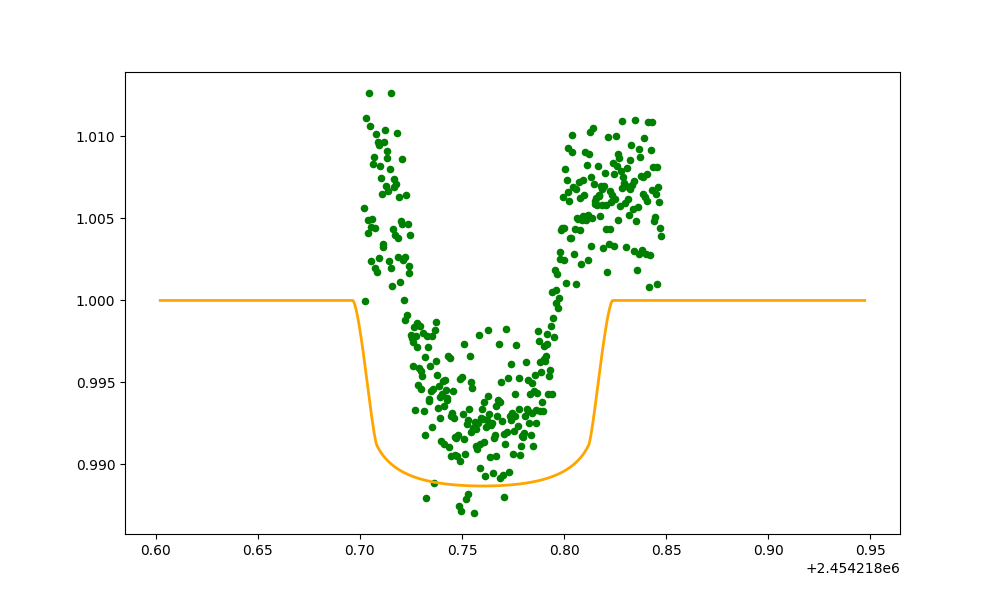

In [8]:
# model_rv = exozippy_rv(rdata['bjd'], tc, period, gamma, K)

import exozippy.exozippy as ez
import exozippy.exozippy_rv as ezrv
import exozippy.exozippy_tran as eztran
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
# read_rv
rdata = ez.read_rv("/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3b.HIRES.rv")
tdata = ez.read_tran("/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/n20070428.Sloani.KepCam.dat")
par = ez.read_par("/Users/wangxianyu/Program/Github/EXOZIPPy/data/exofastv2/examples/hat3/HAT-3.priors")

tc = 2454218.76016
period =  2.899703
gamma = -4.5
K =  80
ar = 8
inc = 90
# inc, ar, tp, period, e, omega, p, u1, u2, f0,
inc = 90
ar = 8
tp = 2454218.76016
period = 2.899703
e = 0
omega = np.radians(90.0)
p = 0.1
u1 = 0.2
u2 = 0.3
f0 = 1.0



# Transit system parameters
inc = np.radians(90.0)    # Orbital inclination (edge-on)

# bjd_model = np.linspace(np.min(rdata['bjd'])-1, np.max(rdata['bjd'])+1, 1000)
# model_rv = ezrv.exozippy_rv(bjd_model, tc, period, gamma, K)
# plt.figure(figsize=(10, 6))
# ax = plt.gca()
# ax.scatter(rdata['bjd'], rdata['rv'], label='Observed RV', color='blue', s=20)
# ax.plot(bjd_model, model_rv, label='Model RV', color='red', linewidth=2)

plt.figure(figsize=(10, 6))
ax = plt.gca()
bjd_model = np.linspace(np.min(tdata['bjd'])-0.1, np.max(tdata['bjd'])+0.1, 1000)
from exozippy.exozippy_tran import exozippy_tran
model_flux = eztran.exozippy_tran(bjd_model, inc, ar, tp, period, e, omega, p, u1, u2, f0)


ax.scatter(tdata['bjd'], tdata['flux'], label='Observed Transit', color='green', s=20)
ax.plot(bjd_model, model_flux, label='Model Transit', color='orange', linewidth=2)


Generated transit light curve with 10000 data points
Transit depth: 0.0115
Flux range: [0.988470, 1.000000]


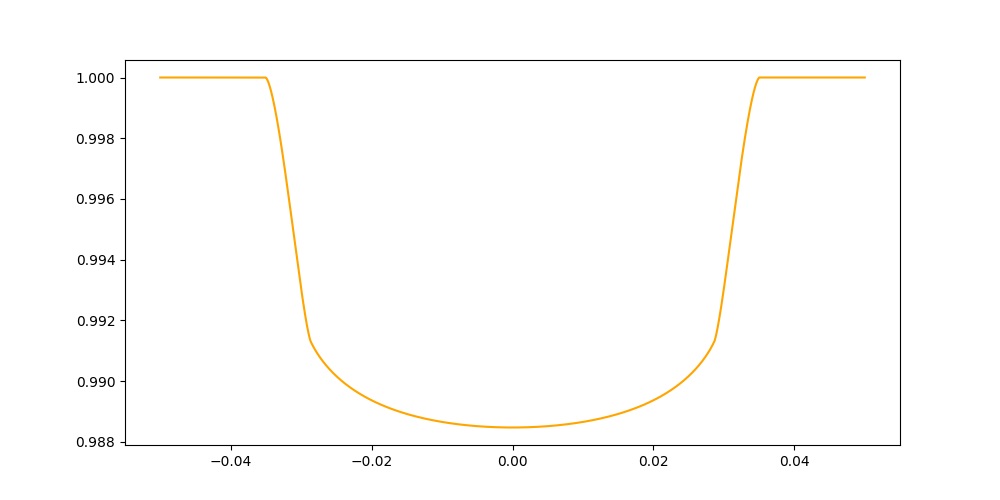

In [ ]:
# Import transit function
import exozippy.exozippy_tran as eztran

# High-resolution time array for performance testing
time = np.linspace(-0.05, 0.05, 10000)  # 10k data points

# Transit system parameters
inc = np.radians(90.0)    # Orbital inclination (edge-on)
ar = 15.0                 # Semi-major axis in stellar radii (a/R*)
tp = 0                    # Time of periastron passage
period = 3.0              # Orbital period (days)
e = 0.0                   # Eccentricity (circular orbit)
omega = np.radians(90.0)  # Argument of periastron
p = 0.1                   # Planet-to-star radius ratio (Rp/R*)
u1 = 0.3                  # Linear limb darkening coefficient
u2 = 0.2                  # Quadratic limb darkening coefficient
f0 = 1.0                  # Baseline flux

# Generate transit light curve
model_flux = eztran.exozippy_tran(time, inc, ar, tp, period, e, omega, p, u1, u2, f0)

print(f"Generated transit light curve with {len(time)} data points")
print(f"Transit depth: {(1.0 - np.min(model_flux)):.4f}")
print(f"Flux range: [{np.min(model_flux):.6f}, {np.max(model_flux):.6f}]")
plt.figure(figsize=(10, 5))
plt.plot(time, model_flux, label='Model Transit', color='orange')
